# Further Data Analysis 
### Now we want to focus to the categories which ocuppy the top-five number of paper from 2014 to 2020, finding thier daily  

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
path="/content/drive/My Drive/Research/Data/"

os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['2019_2020_all_data_final.csv',
 '2014_abs',
 '2015_abs',
 '2016_abs',
 '2017_abs',
 '2018_abs',
 'My_Process',
 'all_data_statistic.csv',
 'top_category_details.csv']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
'''
from time import monotonic
#检查submassion的格式
years = ['2020','2019']
num_2020=0
num_2019=0
num_short_sub=0
num_float=0
mon=[]
for iterm in data['Version']:
  if type(iterm) != float:
    list_year=iterm.split()
    #print(list_year)
    if len(list_year) > 5:
      if list_year[-5] == '2020':
        num_2020+=1
        if list_year[-6] not in mon:
          mon.append(list_year[-6])
      if list_year[-5]== '2019':
        num_2019 +=1
        if list_year[-6] not in mon:
          mon.append(list_year[-6])
    else:
      num_short_sub+=1
  else:
    num_float+=1


print(num_2020)
print(num_2019)
print(num_float)
print(num_short_sub)
print(mon)
'''

"\nfrom time import monotonic\n#检查submassion的格式\nyears = ['2020','2019']\nnum_2020=0\nnum_2019=0\nnum_short_sub=0\nnum_float=0\nmon=[]\nfor iterm in data['Version']:\n  if type(iterm) != float:\n    list_year=iterm.split()\n    #print(list_year)\n    if len(list_year) > 5:\n      if list_year[-5] == '2020':\n        num_2020+=1\n        if list_year[-6] not in mon:\n          mon.append(list_year[-6])\n      if list_year[-5]== '2019':\n        num_2019 +=1\n        if list_year[-6] not in mon:\n          mon.append(list_year[-6])\n    else:\n      num_short_sub+=1\n  else:\n    num_float+=1\n\n\nprint(num_2020)\nprint(num_2019)\nprint(num_float)\nprint(num_short_sub)\nprint(mon)\n"

In [ ]:
#抽取category信息
#input:text  output:category字符串，若input是dirty data,返回none
def cat_processor(text):
  result=''
  if type(text) != float :
    if(text!='subject/category'):
      for cat in text.split(";"):
        cat=cat.strip()
        result = cat.split('(')[1].split(')')[0].split('.')[0]
    else:
      result='none'
  else:
    result ='none'
  return  result

#抽取日期信息
#input：text  output:日期，若input为dirty data,返回none
def Date_processor(text):
  year='none'
  month='none'
  if type(text) != float:
    list_text=text.split()
    if len(list_text) > 5:
      year= list_text[-5]
      month=list_text[-6]
  return year,month

month_dict={'Jan':0,'Feb':1,'Mar':2,'Apr':3,'May':4,'Jun':5,'Jul':6,'Aug':7,
            'Sep':8,'Oct':9,'Nov':10,'Dec':11}

# 定义种类统计函数
#input: data:要统计的数据   cat_name:统计量（种类）   cat_record:累积量（为了可以分步统计）
def cat_stats(data,cat_name,cat_record):
  for index in range(len(data['Version'])):
    row_info = data.loc[index]
    category = row_info[0]
    Date = row_info[1]

    category = cat_processor(category)
    year,month = Date_processor(Date)

    if category!='none' and year!='none' and month!='none':
      if category == cat_name:
        middle_data=cat_record[year]
        middle_data[month_dict[month]]+=1
        cat_record[year]=middle_data

  return cat_record



In [ ]:
# 标定读取数据
docname_2014 =['arxiv_2014_half1_p1','arxiv_2014_half1_p2','arxiv_2014_half1_p3',
               'arxiv_2014_half1_p4','arxiv_2014_half1_p5','arxiv_2014_half1_p6',
               'arxiv_2014_half1_p7','arxiv_2014_half1_p8','arxiv_2014_half1_p9',
               'arxiv_2014_half2_p1','arxiv_2014_half2_p2','arxiv_2014_half2_p3',
               'arxiv_2014_half2_p4','arxiv_2014_half2_p5','arxiv_2014_half2_p6']

docname_2015 =['arxiv_2015_p1','arxiv_2015_p2','arxiv_2015_p3','arxiv_2015_p4',
               'arxiv_2015_p5','arxiv_2015_p6','arxiv_2015_p7','arxiv_2015_p8',
               'arxiv_2015_p9']

docname_2016=['arxiv_2016_p1','arxiv_2016_p2','arxiv_2016_p3','arxiv_2016_p4',
              'arxiv_2016_p5','arxiv_2016_p6','arxiv_2016_p7','arxiv_2016_p8',
              'arxiv_2016_p9','arxiv_2016_p10']

docname_2017 = ['2017-1','2017-2','2017-3','2017-4','2017-5','2017-6','2017-7',
                '2017-8']

docname_2018 =['arxiv_2018_half1_p1','arxiv_2018_half1_p2','arxiv_2018_half1_p3',
               'arxiv_2018_half1_p4','arxiv_2018_half1_p5','arxiv_2018_half1_p6',
               'arxiv_2018_half1_p7','arxiv_2018_half2_p1','arxiv_2018_half2_p2',
               'arxiv_2018_half2_p3','arxiv_2018_half2_p4','arxiv_2018_half2_p5',
               'arxiv_2018_half2_p6','arxiv_2018_half2_p7']

docname_2019 = ['2019_2020_all_data_final']

In [ ]:
# find statistics for 'cs' subject:
cs_record={'2014':np.zeros(12),'2015':np.zeros(12),'2016':np.zeros(12),
              '2017':np.zeros(12),'2018':np.zeros(12),'2019':np.zeros(12),
              '2020':np.zeros(12),'2021':np.zeros(12)}
cat_name='cs'

for document in docname_2014:
  data = pd.read_csv(path+'2014_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  cs_record = cat_stats(data=data,cat_name=cat_name,cat_record=cs_record)
print('complete processing 2014 data\n')

for document in docname_2015:
  data = pd.read_csv(path+'2015_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  cs_record = cat_stats(data=data,cat_name=cat_name,cat_record=cs_record)
print('complete processing 2015 data\n')

for document in docname_2016:
  data = pd.read_csv(path+'2016_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  cs_record = cat_stats(data=data,cat_name=cat_name,cat_record=cs_record)
print('complete processing 2016 data\n')

for document in docname_2017:
  data = pd.read_csv(path+'2017_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  cs_record = cat_stats(data=data,cat_name=cat_name,cat_record=cs_record)
print('complete processing 2017 data\n')

for document in docname_2018:
  data = pd.read_csv(path+'2018_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  cs_record = cat_stats(data=data,cat_name=cat_name,cat_record=cs_record)
print('complete processing 2018 data\n')

for document in docname_2019:
  data = pd.read_csv(path+document+'.csv',usecols=[4,8],encoding='ISO-8859-1')
  cs_record = cat_stats(data=data,cat_name=cat_name,cat_record=cs_record)
print('complete processing 2019 data\n')

cs_record

complete processing 2014 data

complete processing 2015 data

complete processing 2016 data

complete processing 2017 data

complete processing 2018 data

complete processing 2019 data



{'2014': array([1049.,  806.,  793.,  995.,  998.,  849.,  887.,  838.,  923.,
         877.,  881.,  906.]),
 '2015': array([ 886.,  912., 1023., 1084., 1094., 1038., 1086.,  898., 1096.,
        1020., 1067., 1042.]),
 '2016': array([1099., 1117., 1249., 1427., 1415., 1435., 1316., 1302., 1452.,
        1372., 1511., 1294.]),
 '2017': array([1318., 1448., 1802., 1691., 1919., 1677., 1937., 1903., 1921.,
        1573., 1936., 1660.]),
 '2018': array([1683., 1869., 2179., 2142., 2583., 2284., 2353., 2140., 2208.,
        2327., 2403., 1964.]),
 '2019': array([2248., 2353., 2736., 3269., 2984., 2834., 2900., 2960., 3132.,
        2964., 2853., 2510.]),
 '2020': array([2595., 2932., 3926., 5724., 4311., 2933., 4306., 3817., 4081.,
        5865., 4833.,  142.]),
 '2021': array([11., 39.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

In [ ]:
# find statistics for 'stat' subject:
stat_record={'2014':np.zeros(12),'2015':np.zeros(12),'2016':np.zeros(12),
              '2017':np.zeros(12),'2018':np.zeros(12),'2019':np.zeros(12),
              '2020':np.zeros(12),'2021':np.zeros(12)}
cat_name='stat'

for document in docname_2014:
  data = pd.read_csv(path+'2014_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  stat_record = cat_stats(data=data,cat_name=cat_name,cat_record=stat_record)
print('complete processing 2014 data\n')

for document in docname_2015:
  data = pd.read_csv(path+'2015_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  stat_record = cat_stats(data=data,cat_name=cat_name,cat_record=stat_record)
print('complete processing 2015 data\n')

for document in docname_2016:
  data = pd.read_csv(path+'2016_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  stat_record = cat_stats(data=data,cat_name=cat_name,cat_record=stat_record)
print('complete processing 2016 data\n')

for document in docname_2017:
  data = pd.read_csv(path+'2017_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  stat_record = cat_stats(data=data,cat_name=cat_name,cat_record=stat_record)
print('complete processing 2017 data\n')

for document in docname_2018:
  data = pd.read_csv(path+'2018_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  stat_record = cat_stats(data=data,cat_name=cat_name,cat_record=stat_record)
print('complete processing 2018 data\n')

for document in docname_2019:
  data = pd.read_csv(path+document+'.csv',usecols=[4,8],encoding='ISO-8859-1')
  stat_record = cat_stats(data=data,cat_name=cat_name,cat_record=stat_record)
print('complete processing 2019 data\n')

stat_record

complete processing 2014 data

complete processing 2015 data

complete processing 2016 data

complete processing 2017 data

complete processing 2018 data

complete processing 2019 data



{'2014': array([168., 168., 151., 152., 207., 152., 155., 148., 153., 202., 229.,
        166.]),
 '2015': array([192., 193., 204., 164., 217., 258., 232., 195., 252., 197., 246.,
        206.]),
 '2016': array([190., 251., 244., 227., 281., 290., 237., 228., 250., 276., 298.,
        266.]),
 '2017': array([260., 286., 305., 297., 386., 337., 313., 338., 343., 418., 502.,
        381.]),
 '2018': array([370., 462., 531., 470., 583., 704., 631., 552., 651., 792., 857.,
        695.]),
 '2019': array([ 826.,  905.,  852.,  932., 1269., 1235., 1057.,  925., 1161.,
        1489., 1415., 1213.]),
 '2020': array([1100., 1574., 1621., 2026., 1488., 1935., 1780., 1349., 1444.,
        1713., 1009.,   54.]),
 '2021': array([ 4., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

In [ ]:
# find statistics for 'hep-ph' subject:
hep_ph_record={'2014':np.zeros(12),'2015':np.zeros(12),'2016':np.zeros(12),
              '2017':np.zeros(12),'2018':np.zeros(12),'2019':np.zeros(12),
              '2020':np.zeros(12),'2021':np.zeros(12)}
cat_name='hep-ph'

for document in docname_2014:
  data = pd.read_csv(path+'2014_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  hep_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_ph_record)
print('complete processing 2014 data\n')

for document in docname_2015:
  data = pd.read_csv(path+'2015_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  hep_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_ph_record)
print('complete processing 2015 data\n')

for document in docname_2016:
  data = pd.read_csv(path+'2016_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  hep_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_ph_record)
print('complete processing 2016 data\n')

for document in docname_2017:
  data = pd.read_csv(path+'2017_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  hep_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_ph_record)
print('complete processing 2017 data\n')

for document in docname_2018:
  data = pd.read_csv(path+'2018_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  hep_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_ph_record)
print('complete processing 2018 data\n')

for document in docname_2019:
  data = pd.read_csv(path+document+'.csv',usecols=[4,8],encoding='ISO-8859-1')
  hep_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_ph_record)
print('complete processing 2019 data\n')

hep_ph_record

complete processing 2014 data

complete processing 2015 data

complete processing 2016 data

complete processing 2017 data

complete processing 2018 data

complete processing 2019 data



{'2014': array([273., 261., 241., 252., 271., 240., 282., 251., 262., 310., 325.,
        298.]),
 '2015': array([245., 202., 249., 236., 271., 279., 290., 250., 342., 357., 289.,
        313.]),
 '2016': array([285., 260., 279., 288., 281., 247., 306., 271., 286., 293., 340.,
        339.]),
 '2017': array([225., 250., 254., 252., 289., 238., 208., 245., 279., 328., 325.,
        328.]),
 '2018': array([259., 205., 270., 236., 290., 239., 289., 266., 260., 320., 322.,
        311.]),
 '2019': array([335., 272., 309., 288., 298., 276., 332., 292., 299., 326., 312.,
        337.]),
 '2020': array([286., 305., 401., 494., 342., 338., 346., 335., 377., 367., 396.,
         21.]),
 '2021': array([1., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [ ]:
# find statistics for 'quant-ph' subject:
quant_ph_record={'2014':np.zeros(12),'2015':np.zeros(12),'2016':np.zeros(12),
              '2017':np.zeros(12),'2018':np.zeros(12),'2019':np.zeros(12),
              '2020':np.zeros(12),'2021':np.zeros(12)}
cat_name='quant-ph'

for document in docname_2014:
  data = pd.read_csv(path+'2014_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  quant_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=quant_ph_record)
print('complete processing 2014 data\n')

for document in docname_2015:
  data = pd.read_csv(path+'2015_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  quant_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=quant_ph_record)
print('complete processing 2015 data\n')

for document in docname_2016:
  data = pd.read_csv(path+'2016_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  quant_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=quant_ph_record)
print('complete processing 2016 data\n')

for document in docname_2017:
  data = pd.read_csv(path+'2017_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  quant_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=quant_ph_record)
print('complete processing 2017 data\n')

for document in docname_2018:
  data = pd.read_csv(path+'2018_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  quant_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=quant_ph_record)
print('complete processing 2018 data\n')

for document in docname_2019:
  data = pd.read_csv(path+document+'.csv',usecols=[4,8],encoding='ISO-8859-1')
  quant_ph_record = cat_stats(data=data,cat_name=cat_name,cat_record=quant_ph_record)
print('complete processing 2019 data\n')

quant_ph_record

complete processing 2014 data

complete processing 2015 data

complete processing 2016 data

complete processing 2017 data

complete processing 2018 data

complete processing 2019 data



{'2014': array([332., 303., 362., 312., 323., 299., 358., 349., 335., 355., 310.,
        391.]),
 '2015': array([332., 331., 342., 339., 347., 353., 334., 311., 365., 391., 329.,
        345.]),
 '2016': array([327., 349., 359., 347., 381., 347., 394., 356., 385., 378., 367.,
        358.]),
 '2017': array([354., 343., 405., 356., 418., 418., 359., 333., 404., 377., 387.,
        394.]),
 '2018': array([349., 355., 416., 367., 427., 402., 453., 410., 359., 391., 420.,
        346.]),
 '2019': array([479., 416., 486., 526., 511., 449., 532., 495., 528., 522., 515.,
        521.]),
 '2020': array([516., 506., 720., 926., 667., 600., 665., 632., 755., 700., 656.,
         33.]),
 '2021': array([4., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [ ]:
# find statistics for 'hep-th' subject:
hep_th_record={'2014':np.zeros(12),'2015':np.zeros(12),'2016':np.zeros(12),
              '2017':np.zeros(12),'2018':np.zeros(12),'2019':np.zeros(12),
              '2020':np.zeros(12),'2021':np.zeros(12)}
cat_name='hep-th'

for document in docname_2014:
  data = pd.read_csv(path+'2014_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  hep_th_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_th_record)
print('complete processing 2014 data\n')

for document in docname_2015:
  data = pd.read_csv(path+'2015_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  hep_th_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_th_record)
print('complete processing 2015 data\n')

for document in docname_2016:
  data = pd.read_csv(path+'2016_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  hep_th_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_th_record)
print('complete processing 2016 data\n')

for document in docname_2017:
  data = pd.read_csv(path+'2017_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  hep_th_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_th_record)
print('complete processing 2017 data\n')

for document in docname_2018:
  data = pd.read_csv(path+'2018_abs/'+document+'.csv',usecols=[4,8],encoding='ISO-8859-1',header=None,names=['subject/category','Version'])
  hep_th_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_th_record)
print('complete processing 2018 data\n')

for document in docname_2019:
  data = pd.read_csv(path+document+'.csv',usecols=[4,8],encoding='ISO-8859-1')
  hep_th_record = cat_stats(data=data,cat_name=cat_name,cat_record=hep_th_record)
print('complete processing 2019 data\n')

hep_th_record

complete processing 2014 data

complete processing 2015 data

complete processing 2016 data

complete processing 2017 data

complete processing 2018 data

complete processing 2019 data



{'2014': array([239., 196., 248., 243., 268., 253., 280., 274., 273., 298., 266.,
        331.]),
 '2015': array([215., 236., 249., 224., 244., 269., 294., 238., 311., 324., 303.,
        316.]),
 '2016': array([267., 270., 288., 265., 273., 249., 281., 236., 265., 269., 302.,
        280.]),
 '2017': array([218., 231., 257., 246., 288., 274., 259., 261., 279., 296., 316.,
        294.]),
 '2018': array([298., 255., 295., 270., 309., 267., 289., 253., 276., 296., 289.,
        288.]),
 '2019': array([318., 267., 351., 315., 354., 316., 325., 304., 331., 392., 341.,
        364.]),
 '2020': array([325., 334., 425., 523., 430., 392., 423., 399., 473., 456., 451.,
         24.]),
 '2021': array([1., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [ ]:
# 将字典嵌套数组的数据结构打开，变为单字典结构
def dict2dict(dictionary):
  years_final=['2014','2015','2016','2017','2018','2019','2020']
  month_final=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
  result={}
  for year in years_final:
    i=0
    for month in month_final:
      key=year+'_'+month
      value_list=dictionary[year]
      result[key]=value_list[i]
      i+=1
  return result


In [ ]:
#字典-数组  ===> 字典 
cs_dict = dict2dict(cs_record)
stat_dict = dict2dict(stat_record)
hep_ph_dict = dict2dict(hep_ph_record)
quant_ph_dict = dict2dict(quant_ph_record)
hep_th_dict =dict2dict(hep_th_record)

#字典  ==>  dataframe
cs_pd = pd.DataFrame(pd.Series(cs_dict),columns=['cs'])
stat_pd = pd.DataFrame(pd.Series(stat_dict),columns=['stat'])
hep_ph_pd = pd.DataFrame(pd.Series(hep_ph_dict),columns=['hep_ph'])
quant_ph_pd = pd.DataFrame(pd.Series(quant_ph_dict),columns=['quant_pd'])
hep_th_pd = pd.DataFrame(pd.Series(hep_th_dict),columns=['hep_th'])

# 合并datafame
stat_mon = cs_pd.copy()
stat_mon=stat_mon.join(stat_pd,how='left')
stat_mon=stat_mon.join(hep_ph_pd,how='left')
stat_mon=stat_mon.join(quant_ph_pd,how='left')
stat_mon=stat_mon.join(hep_th_pd,how='left')

stat_mon.T.to_csv(path+'top5_statistic_months.csv')
stat_mon.T

,2014_Jan,2014_Feb,2014_Mar,2014_Apr,2014_May,2014_Jun,2014_Jul,2014_Aug,2014_Sep,2014_Oct,2014_Nov,2014_Dec,2015_Jan,2015_Feb,2015_Mar,2015_Apr,2015_May,2015_Jun,2015_Jul,2015_Aug,2015_Sep,2015_Oct,2015_Nov,2015_Dec,2016_Jan,2016_Feb,2016_Mar,2016_Apr,2016_May,2016_Jun,2016_Jul,2016_Aug,2016_Sep,2016_Oct,2016_Nov,2016_Dec,2017_Jan,2017_Feb,2017_Mar,2017_Apr,...,2017_Sep,2017_Oct,2017_Nov,2017_Dec,2018_Jan,2018_Feb,2018_Mar,2018_Apr,2018_May,2018_Jun,2018_Jul,2018_Aug,2018_Sep,2018_Oct,2018_Nov,2018_Dec,2019_Jan,2019_Feb,2019_Mar,2019_Apr,2019_May,2019_Jun,2019_Jul,2019_Aug,2019_Sep,2019_Oct,2019_Nov,2019_Dec,2020_Jan,2020_Feb,2020_Mar,2020_Apr,2020_May,2020_Jun,2020_Jul,2020_Aug,2020_Sep,2020_Oct,2020_Nov,2020_Dec
cs,1049.0,806.0,793.0,995.0,998.0,849.0,887.0,838.0,923.0,877.0,881.0,906.0,886.0,912.0,1023.0,1084.0,1094.0,1038.0,1086.0,898.0,1096.0,1020.0,1067.0,1042.0,1099.0,1117.0,1249.0,1427.0,1415.0,1435.0,1316.0,1302.0,1452.0,1372.0,1511.0,1294.0,1318.0,1448.0,1802.0,1691.0,...,1921.0,1573.0,1936.0,1660.0,1683.0,1869.0,2179.0,2142.0,2583.0,2284.0,2353.0,2140.0,2208.0,2327.0,2403.0,1964.0,2248.0,2353.0,2736.0,3269.0,2984.0,2834.0,2900.0,2960.0,3132.0,2964.0,2853.0,2510.0,2595.0,2932.0,3926.0,5724.0,4311.0,2933.0,4306.0,3817.0,4081.0,5865.0,4833.0,142.0
stat,168.0,168.0,151.0,152.0,207.0,152.0,155.0,148.0,153.0,202.0,229.0,166.0,192.0,193.0,204.0,164.0,217.0,258.0,232.0,195.0,252.0,197.0,246.0,206.0,190.0,251.0,244.0,227.0,281.0,290.0,237.0,228.0,250.0,276.0,298.0,266.0,260.0,286.0,305.0,297.0,...,343.0,418.0,502.0,381.0,370.0,462.0,531.0,470.0,583.0,704.0,631.0,552.0,651.0,792.0,857.0,695.0,826.0,905.0,852.0,932.0,1269.0,1235.0,1057.0,925.0,1161.0,1489.0,1415.0,1213.0,1100.0,1574.0,1621.0,2026.0,1488.0,1935.0,1780.0,1349.0,1444.0,1713.0,1009.0,54.0
hep_ph,273.0,261.0,241.0,252.0,271.0,240.0,282.0,251.0,262.0,310.0,325.0,298.0,245.0,202.0,249.0,236.0,271.0,279.0,290.0,250.0,342.0,357.0,289.0,313.0,285.0,260.0,279.0,288.0,281.0,247.0,306.0,271.0,286.0,293.0,340.0,339.0,225.0,250.0,254.0,252.0,...,279.0,328.0,325.0,328.0,259.0,205.0,270.0,236.0,290.0,239.0,289.0,266.0,260.0,320.0,322.0,311.0,335.0,272.0,309.0,288.0,298.0,276.0,332.0,292.0,299.0,326.0,312.0,337.0,286.0,305.0,401.0,494.0,342.0,338.0,346.0,335.0,377.0,367.0,396.0,21.0
quant_pd,332.0,303.0,362.0,312.0,323.0,299.0,358.0,349.0,335.0,355.0,310.0,391.0,332.0,331.0,342.0,339.0,347.0,353.0,334.0,311.0,365.0,391.0,329.0,345.0,327.0,349.0,359.0,347.0,381.0,347.0,394.0,356.0,385.0,378.0,367.0,358.0,354.0,343.0,405.0,356.0,...,404.0,377.0,387.0,394.0,349.0,355.0,416.0,367.0,427.0,402.0,453.0,410.0,359.0,391.0,420.0,346.0,479.0,416.0,486.0,526.0,511.0,449.0,532.0,495.0,528.0,522.0,515.0,521.0,516.0,506.0,720.0,926.0,667.0,600.0,665.0,632.0,755.0,700.0,656.0,33.0
hep_th,239.0,196.0,248.0,243.0,268.0,253.0,280.0,274.0,273.0,298.0,266.0,331.0,215.0,236.0,249.0,224.0,244.0,269.0,294.0,238.0,311.0,324.0,303.0,316.0,267.0,270.0,288.0,265.0,273.0,249.0,281.0,236.0,265.0,269.0,302.0,280.0,218.0,231.0,257.0,246.0,...,279.0,296.0,316.0,294.0,298.0,255.0,295.0,270.0,309.0,267.0,289.0,253.0,276.0,296.0,289.0,288.0,318.0,267.0,351.0,315.0,354.0,316.0,325.0,304.0,331.0,392.0,341.0,364.0,325.0,334.0,425.0,523.0,430.0,392.0,423.0,399.0,473.0,456.0,451.0,24.0


In [ ]:
stat_mon

,cs,stat,hep_ph,quant_pd,hep_th
2014_Jan,1049.0,168.0,273.0,332.0,239.0
2014_Feb,806.0,168.0,261.0,303.0,196.0
2014_Mar,793.0,151.0,241.0,362.0,248.0
2014_Apr,995.0,152.0,252.0,312.0,243.0
2014_May,998.0,207.0,271.0,323.0,268.0
...,...,...,...,...,...
2020_Aug,3817.0,1349.0,335.0,632.0,399.0
2020_Sep,4081.0,1444.0,377.0,755.0,473.0
2020_Oct,5865.0,1713.0,367.0,700.0,456.0
2020_Nov,4833.0,1009.0,396.0,656.0,451.0


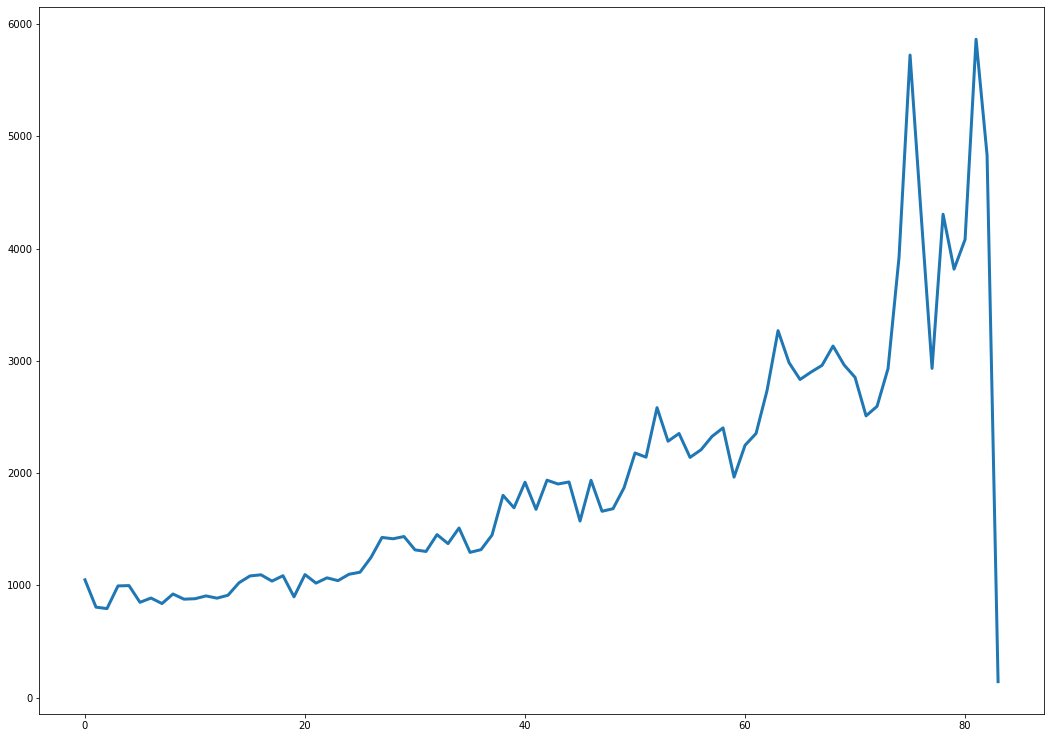

In [ ]:
plt.figure(figsize=(18,13))
data_plot = stat_mon['cs'].tolist()

x = np.arange(0,84,1)
y = data_plot
plt.plot(x,y, linewidth=3)


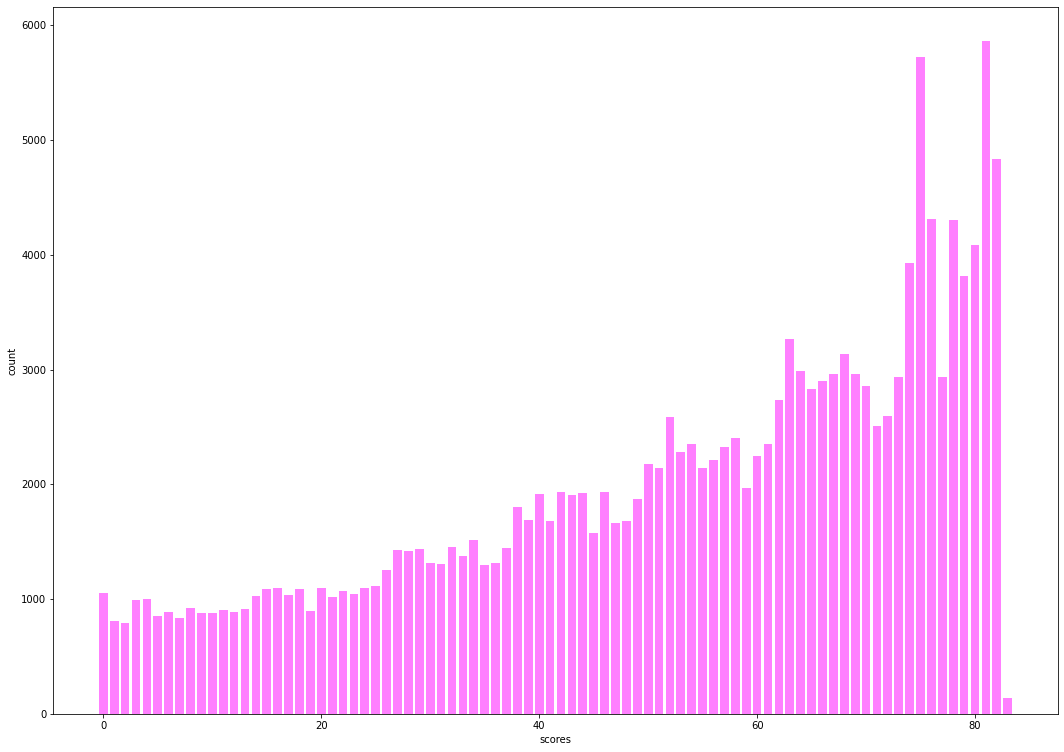

In [ ]:
plt.figure(figsize=(18,13))
data_plot = stat_mon['cs'].tolist()

x = np.arange(0,84,1)
y = data_plot
bins=np.arange(2014,2020,0.08) #设置连续的边界值，即直方图的分布区间[0,10],[10,20]... 
plt.bar(x,y,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明 
plt.xlabel('scores') 
plt.ylabel('count') 
#plt.xlim(2014,2020)#设置x轴分布范围 
plt.show()